In [2]:
import pandas as pd
import glob
import numpy as np
import pickle
import networkx as nx
import itertools
import matplotlib.pyplot as plt
from collections import Counter
import powerlaw
import math
import operator
from itertools import chain, combinations
from scipy.cluster.hierarchy import dendrogram

In [2]:
#Read SNet
input_path = "models/SNetLargestComponent.gml"
G = nx.read_gml(input_path)

n = G.number_of_nodes()
m = G.number_of_edges()
print(n, m)

3524 156934


In [4]:
#Targeted subreddit network
subreddits = set(['reddit.com', 'pics', 'worldnews', 'programming',
'business', 'politics', 'obama', 'science', 'technology', 'WTF', 'AskReddit', 'netsec', 'philosophy', 'videos', 'offbeat',
'funny', 'entertainment', 'linux', 'geek', 'gaming', 'comics', 'gadgets', 'nsfw', 'news', 'environment', 'atheism',
'canada', 'math', 'Economics', 'scifi', 'bestof', 'cogsci', 'joel', 'Health', 'guns', 'photography', 'software', 'history',
'ideas'])

node_list = list(G.nodes())
nodes_to_remove = [n for n in node_list if n not in subreddits]
print(len(nodes_to_remove))
print(len(subreddits))
G.remove_nodes_from(nodes_to_remove)

number_of_nodes = G.number_of_nodes()
number_of_edges = G.number_of_edges()
print("Number of nodes in targeted subreddit network : ", number_of_nodes)
print("Number of edges in targeted subreddit network : ", number_of_edges)

3485
39
Number of nodes in targeted subreddit network :  39
Number of edges in targeted subreddit network :  741


In [ ]:
core_nodes = pickle.load('snet_core')

In [9]:
#Save SNetT

output_path = "models/SNetT.gml"
nx.write_gml(G, output_path)

In [3]:
G = nx.read_gml("models/SNetT.gml")

In [13]:
#3.7 Network density

absolut_number_of_edges = number_of_nodes * (number_of_nodes - 1)/2
network_density = number_of_edges/absolut_number_of_edges

print("Network density : ", network_density)

Network density :  1.0


In [14]:
#3.8 Diameter and Average shortest path

diameter = nx.diameter(G)
print("SNetT diameter: ", diameter)

average_shortest_path_length = nx.average_shortest_path_length(G, weight='weight') 
print("Average shortest path length with weight: ", average_shortest_path_length)
average_shortest_path_length = nx.average_shortest_path_length(G) 
print("Average shortest path length without weight: ", average_shortest_path_length)

SNetT diameter:  1
Average shortest path length with weight:  110.46423751686909
Average shortest path length without weight:  1.0


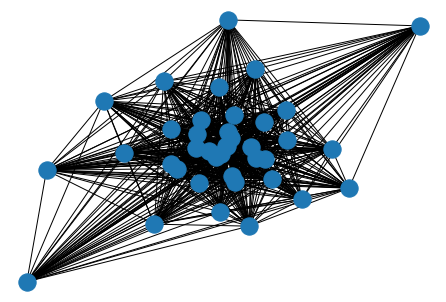

In [32]:
#3.9 Whole graph is one connected component
pos = nx.spring_layout(G, seed=1000, weight='weight',  k= 3/math.sqrt(n))  
nx.draw(G, pos=pos)
plt.show()

In [34]:
#3.10 ER Model

n = G.number_of_nodes()
m = G.number_of_edges()
print("\nNumber of nodes : ", n)
print("Number of edges : ", m)

p = ( 2*float(m) ) / ( n* (n-1) )
er_net = nx.erdos_renyi_graph(n,p, seed=1000)

delta_m = m - er_net.number_of_edges()


Number of nodes :  39
Number of edges :  741
Broj čvorova originalne mreže minus broj čvorova u ER mreži iznosi 0, što je odstupanje od 0.0%


Average clustering coefficient :  1.0
Global clustering coefficient :  1.0


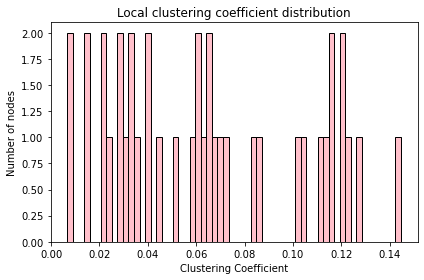

In [18]:
#3.10 Average and global clustering coefficient, Local clustering coefficient distribution for SNetT

average_clustering_coefficient = nx.average_clustering(G)
global_clustering_coefficient = nx.transitivity(G)

subreddit, clustering_coef = zip(*nx.clustering(G, weight = "weight").items())
local_clustering_data = [(subreddit, cc)  for subreddit, cc in zip(subreddit, clustering_coef) if cc > 0]
local_clustering_coefficients = pd.DataFrame(local_clustering_data, columns = ["subreddit", "cc"])
local_clustering_coefficients.sort_values('cc', inplace = True, ascending=False)

print("Average clustering coefficient : ", average_clustering_coefficient)
print("Global clustering coefficient : ", global_clustering_coefficient)

plt.hist(local_clustering_coefficients['cc'], color = 'pink', edgecolor = 'black',
         bins = int(300/5))

plt.title('Local clustering coefficient distribution')
plt.xlabel('Clustering Coefficient')
plt.ylabel('Number of nodes')
plt.tight_layout()
plt.show()

Average clustering coefficient :  1.0
Global clustering coefficient :  1.0


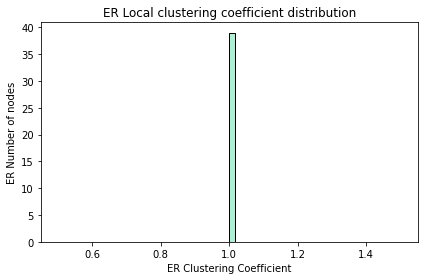

In [23]:
#3.10 Average and global clustering coefficient, Local clustering coefficient distribution for ER

average_clustering_coefficient_er = nx.average_clustering(er_net)
global_clustering_coefficient_er = nx.transitivity(er_net)


subreddit_er, clustering_coef_er = zip(*nx.clustering(er_net, weight = "weight").items())
local_clustering_data_er = [(subreddit, cc)  for subreddit, cc in zip(subreddit_er, clustering_coef_er) if cc > 0]
local_clustering_coefficients_er = pd.DataFrame(local_clustering_data_er, columns = ["subreddit", "cc"])
local_clustering_coefficients_er.sort_values('cc', inplace = True, ascending=False)

print("Average clustering coefficient : ", average_clustering_coefficient_er)
print("Global clustering coefficient : ", global_clustering_coefficient_er)

plt.hist(local_clustering_coefficients_er['cc'], color = '#aaf0d4', edgecolor = 'black',
         bins = int(300/5))

plt.title('ER Local clustering coefficient distribution')
plt.xlabel('ER Clustering Coefficient')
plt.ylabel('ER Number of nodes')
plt.tight_layout()
plt.show()



In [ ]:
#3.12
# Assortativity of unweighted graph -> can not calculate because every node has same degree
r1 = nx.degree_assortativity_coefficient(G)


In [57]:
#3.14 Degree distribution

def plot_deg_frequency(G, weighted = False, xscale = "log", yscale = "log"):

    if weighted:
        degrees = G.degree(weight="weight")
    else:
        degrees = G.degree()
        
    _, deg_list = zip(*degrees)
    deg_counts = Counter(deg_list)        
    #print(deg_counts)
    x, y = zip(*deg_counts.items())                                                      

    plt.figure(1)   

    # prep axes   
    if weighted:
        plt.xlabel('weighted degree')  
    else:
        plt.xlabel('degree')                                                                                                             
    #plt.xscale(xscale)                                                                                                                
    plt.xlim(1, 2*max(x))  

    plt.ylabel('frequency')                                                                                                          
    #plt.yscale(yscale)                                                                                                                
    plt.ylim(0, 2*max(y))                                                                                                             
                                                                                                                                                                                                    
    plt.scatter(x, y, marker='.')                                                                                                    
    plt.show()
    


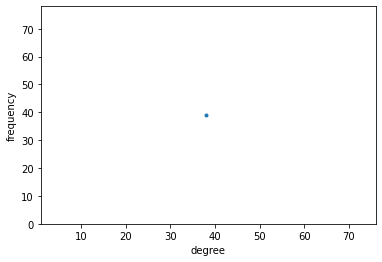

In [58]:
plot_deg_frequency(G)

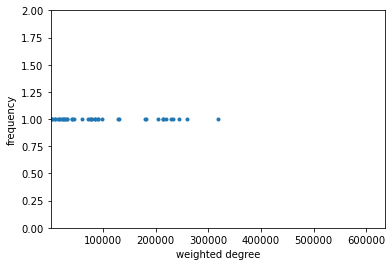

In [59]:
plot_deg_frequency(G, weighted = True)

[38, 38, 38, 38, 38, 38, 38, 38, 38, 38, 38, 38, 38, 38, 38, 38, 38, 38, 38, 38, 38, 38, 38, 38, 38, 38, 38, 38, 38, 38, 38, 38, 38, 38, 38, 38, 38, 38, 38]


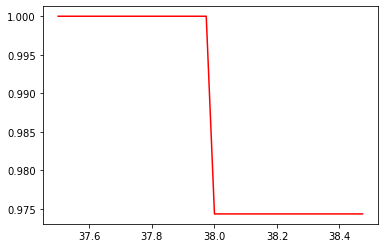

In [63]:
# Power law distribution

degree_sequence = sorted([d for n, d in G.degree()], reverse=True)
print(degree_sequence)
degreeCount = Counter(degree_sequence)
deg, cnt = zip(*degreeCount.items())

max_deg = max(deg) # hoćemo po jedan bin za svaki stepen čvora

# calculating histogram
values, base = np.histogram(deg, bins = max_deg)

# cumulative sum
cumulative = np.cumsum(values)

# Ploting complementary cumulative degree distribution P(X>x)
plt.plot(base[:-1], [float(x)/len(G) for x in len(G) - cumulative], c='red')

plt.show()

In [4]:
#3.15 Hubs and authorities

hubs, authorities =nx.hits(G)

hub_items = sorted(hubs.items(), key=operator.itemgetter(1), reverse=True)[:10]
print("SNetT Hubs\n")
for hub_item in hub_items:
    print(hub_item)

authority_items = sorted(authorities.items(), key=operator.itemgetter(1), reverse=True)[:10]
print("\nSNetT Authorities\n")
for authority_item in authority_items:
    print(authority_item)

SNetT Hubs

('reddit.com', 0.08214455495475691)
('politics', 0.06851748107614875)
('pics', 0.06388730608215877)
('funny', 0.06118211613147492)
('science', 0.05976368705653514)
('technology', 0.05778358819288572)
('worldnews', 0.05667928924994852)
('WTF', 0.05629576388977988)
('entertainment', 0.05402733518492921)
('programming', 0.048350759681633146)

SNetT Authorities

('reddit.com', 0.08214455495475687)
('politics', 0.06851748107614872)
('pics', 0.06388730608215877)
('funny', 0.061182116131474895)
('science', 0.05976368705653512)
('technology', 0.057783588192885704)
('worldnews', 0.05667928924994849)
('WTF', 0.05629576388977985)
('entertainment', 0.0540273351849292)
('programming', 0.048350759681633125)


In [7]:
#3.16 
#degree_centrality, closeness_centrality 
#betweenes_centrality

print("Top 10 Degree centrality:\n")
DC = nx.degree_centrality(G)
dc_items = sorted(DC.items(), key=operator.itemgetter(1), reverse=True)[:10]
for dc_item in dc_items:
    print(dc_item[0], "\t\t",dc_item[1], "\t",G.degree[dc_item[0]])
    
print("\nTop 10 Closeness centrality:\n")
CC = nx.closeness_centrality(G)
cc_items = sorted(CC.items(), key=operator.itemgetter(1), reverse=True)[:10]
for cc_item in cc_items:
    node = cc_item[0]
    print(cc_item[0], "   ", cc_item[1])

print("\nTop 10 Betweenness centrality:\n")
BC = nx.betweenness_centrality(G)
bc_items = sorted(BC.items(), key=operator.itemgetter(1), reverse=True)[:10]
for bc_item in bc_items:
    node = bc_item[0];
    print(bc_item[0], "   ", bc_item[1])
    
print("\nTop 10 Betweenness centrality with weight:\n")
BC = nx.betweenness_centrality(G, weight='weight')
bc_items = sorted(BC.items(), key=operator.itemgetter(1), reverse=True)[:10]
for bc_item in bc_items:
    node = bc_item[0];
    print(bc_item[0], "   ", bc_item[1])

Top 10 Degree centrality:

comics 		 1.0 	 38
joel 		 1.0 	 38
geek 		 1.0 	 38
technology 		 1.0 	 38
atheism 		 1.0 	 38
pics 		 1.0 	 38
gadgets 		 1.0 	 38
linux 		 1.0 	 38
politics 		 1.0 	 38
canada 		 1.0 	 38

Top 10 Closeness centrality:

comics     1.0
joel     1.0
geek     1.0
technology     1.0
atheism     1.0
pics     1.0
gadgets     1.0
linux     1.0
politics     1.0
canada     1.0

Top 10 Betweenness centrality:

comics     0.0
joel     0.0
geek     0.0
technology     0.0
atheism     0.0
pics     0.0
gadgets     0.0
linux     0.0
politics     0.0
canada     0.0

Top 10 Betweenness centrality with weight:

joel     0.7837837837837838
ideas     0.6251778093883358
comics     0.0
geek     0.0
technology     0.0
atheism     0.0
pics     0.0
gadgets     0.0
linux     0.0
politics     0.0


In [81]:
#3.17 Eigenvector centrality with weights

print("\nTop 10 Eigenvector centrality:\n")
EC = nx.eigenvector_centrality(G, weight='weight')
ec_items = sorted(EC.items(), key=operator.itemgetter(1), reverse=True)[:10]
for ec_item in ec_items:
    print(ec_item[0], "   ", ec_item[1])


Top 10 Eigenvector centrality:

reddit.com     0.37979492059977193
politics     0.3167924090789114
pics     0.29538416684223284
funny     0.28287663090541176
science     0.27631844349963935
technology     0.26716358050272865
worldnews     0.2620576662138956
WTF     0.26028440584703383
entertainment     0.24979649128466647
programming     0.2235506248972646


In [6]:
#3.18 Katz centrality

def calculate_beta(default_beta, reddit_beta):
    dict = {}
    i = 0
    for node in G.nodes():
        if node == 'reddit.com':
            dict[node] = reddit_beta
        else:
            dict[node] = default_beta
        i+=1
        
    return dict

In [7]:
lambda_max =  max(nx.adjacency_spectrum(G))
print(1/lambda_max)

(5.566358978068011e-06+0j)


In [8]:
#ne moze 
KC = nx.katz_centrality(G, alpha=1/(2*lambda_max), beta=1.0, max_iter=1000, tol=1e-06, nstart=None, normalized=True, weight=None)
kc_items = sorted(KC.items(), key=operator.itemgetter(1), reverse=True)[:10]
for kc_item in kc_items:
    print(kc_item[0], "   ", kc_item[1])

comics     (0.16012815380508713+0j)
joel     (0.16012815380508713+0j)
geek     (0.16012815380508713+0j)
technology     (0.16012815380508713+0j)
atheism     (0.16012815380508713+0j)
pics     (0.16012815380508713+0j)
gadgets     (0.16012815380508713+0j)
linux     (0.16012815380508713+0j)
politics     (0.16012815380508713+0j)
canada     (0.16012815380508713+0j)


C:\Users\sretenp\Anaconda3\lib\site-packages\networkx\algorithms\centrality\katz.py:184: ComplexWarning: Casting complex values to real discards the imaginary part
  s = 1.0 / sqrt(sum(v ** 2 for v in x.values()))


In [9]:
KC = nx.katz_centrality(G, alpha=1/(2*lambda_max), beta=1.0, max_iter=1000, tol=1e-06, nstart=None, normalized=True, weight='weight')
kc_items = sorted(KC.items(), key=operator.itemgetter(1), reverse=True)[:10]
for kc_item in kc_items:
    print(kc_item[0], "   ", kc_item[1])

reddit.com     (0.2713555114715824+0j)
politics     (0.24097160534862927+0j)
pics     (0.23185988172459182+0j)
funny     (0.22606431506413588+0j)
science     (0.2234190893508833+0j)
technology     (0.21894755902300214+0j)
worldnews     (0.21638307967613551+0j)
WTF     (0.2160262611962931+0j)
entertainment     (0.21078659274553507+0j)
programming     (0.19887963213732276+0j)


In [11]:
KC = nx.katz_centrality(G, alpha=1/(2*lambda_max), beta=calculate_beta(1,2), max_iter=1000, tol=1e-06, nstart=None, normalized=True, weight='weight')
kc_items = sorted(KC.items(), key=operator.itemgetter(1), reverse=True)[:10]
for kc_item in kc_items:
    print(kc_item[0], "   ", kc_item[1])

reddit.com     (0.35433364600096895+0j)
politics     (0.2393228164345688+0j)
pics     (0.22905955828375832+0j)
funny     (0.2230300877440213+0j)
science     (0.2202256769062958+0j)
technology     (0.21596312927207956+0j)
worldnews     (0.213062532931914+0j)
WTF     (0.21251071394808768+0j)
entertainment     (0.20768681103109657+0j)
programming     (0.19525802957814026+0j)


In [10]:
KC = nx.katz_centrality(G, alpha=1/(2*lambda_max), beta=calculate_beta(1,4), max_iter=1000, tol=1e-06, nstart=None, normalized=True, weight='weight')
kc_items = sorted(KC.items(), key=operator.itemgetter(1), reverse=True)[:10]
for kc_item in kc_items:
    print(kc_item[0], "   ", kc_item[1])

reddit.com     (0.4847744962107183+0j)
politics     (0.23248622471405148+0j)
pics     (0.22050487327023943+0j)
funny     (0.21419438348310033+0j)
science     (0.21117634183651157+0j)
technology     (0.20733113001047307+0j)
worldnews     (0.20392740737587284+0j)
WTF     (0.2030642101323731+0j)
entertainment     (0.19900758926813894+0j)
programming     (0.1859342594830353+0j)


In [94]:
#3.20 Dendogram

def plot_and_save_dendrogram(G):

    plt.rcParams["figure.figsize"] = (24,13)
    # get Girvan-Newman communities list
    communities = list(nx.community.girvan_newman(G))

    # building initial dict of node_id to each possible subset:
    node_id = 0
    init_node2community_dict = {node_id: communities[0][0].union(communities[0][1])}
    for comm in communities:
        for subset in list(comm):
            if subset not in init_node2community_dict.values():
                node_id += 1
                init_node2community_dict[node_id] = subset

    # turning this dictionary to the desired format in @mdml's answer
    node_id_to_children = {e: [] for e in init_node2community_dict.keys()}
    for node_id1, node_id2 in combinations(init_node2community_dict.keys(), 2):
        for node_id_parent, group in init_node2community_dict.items():
            if len(init_node2community_dict[node_id1].intersection(init_node2community_dict[node_id2])) == 0 and group == init_node2community_dict[node_id1].union(init_node2community_dict[node_id2]):
                node_id_to_children[node_id_parent].append(node_id1)
                node_id_to_children[node_id_parent].append(node_id2)

    # also recording node_labels dict for the correct label for dendrogram leaves
    node_labels = dict()
    for node_id, group in init_node2community_dict.items():
        if len(group) == 1:
            node_labels[node_id] = list(group)[0]
        else:
            node_labels[node_id] = ''

    # also needing a subset to rank dict to later know within all k-length merges which came first
    subset_rank_dict = dict()
    rank = 0
    for e in communities[::-1]:
        for p in list(e):
            if tuple(p) not in subset_rank_dict:
                subset_rank_dict[tuple(sorted(p))] = rank
                rank += 1
    subset_rank_dict[tuple(sorted(chain.from_iterable(communities[-1])))] = rank

    # my function to get a merge height so that it is unique (probably not that efficient)
    def get_merge_height(sub):
        sub_tuple = tuple(sorted([node_labels[i] for i in sub]))
        n = len(sub_tuple)
        other_same_len_merges = {k: v for k, v in subset_rank_dict.items() if len(k) == n}
        min_rank, max_rank = min(other_same_len_merges.values()), max(other_same_len_merges.values())
        range = (max_rank-min_rank) if max_rank > min_rank else 1
        return float(len(sub)) + 0.8 * (subset_rank_dict[sub_tuple] - min_rank) / range

    # finally using @mdml's magic, slightly modified:
    G           = nx.DiGraph(node_id_to_children)
    nodes       = G.nodes()
    leaves      = set( n for n in nodes if G.out_degree(n) == 0 )
    inner_nodes = [ n for n in nodes if G.out_degree(n) > 0 ]

    # Compute the size of each subtree
    subtree = dict( (n, [n]) for n in leaves )
    for u in inner_nodes:
        children = set()
        node_list = list(node_id_to_children[u])
        while len(node_list) > 0:
            v = node_list.pop(0)
            children.add( v )
            node_list += node_id_to_children[v]
        subtree[u] = sorted(children & leaves)

    inner_nodes.sort(key=lambda n: len(subtree[n])) # <-- order inner nodes ascending by subtree size, root is last

    # Construct the linkage matrix
    leaves = sorted(leaves)
    index  = dict( (tuple([n]), i) for i, n in enumerate(leaves) )
    Z = []
    k = len(leaves)
    for i, n in enumerate(inner_nodes):
        children = node_id_to_children[n]
        x = children[0]
        for y in children[1:]:
            z = tuple(sorted(subtree[x] + subtree[y]))
            i, j = index[tuple(sorted(subtree[x]))], index[tuple(sorted(subtree[y]))]
            Z.append([i, j, get_merge_height(subtree[n]), len(z)]) # <-- float is required by the dendrogram function
            index[z] = k
            subtree[z] = list(z)
            x = z
            k += 1

    # dendrogram
    plt.figure()
    dendrogram(Z, labels=[node_labels[node_id] for node_id in leaves])
    plt.savefig('dendrogram.png')

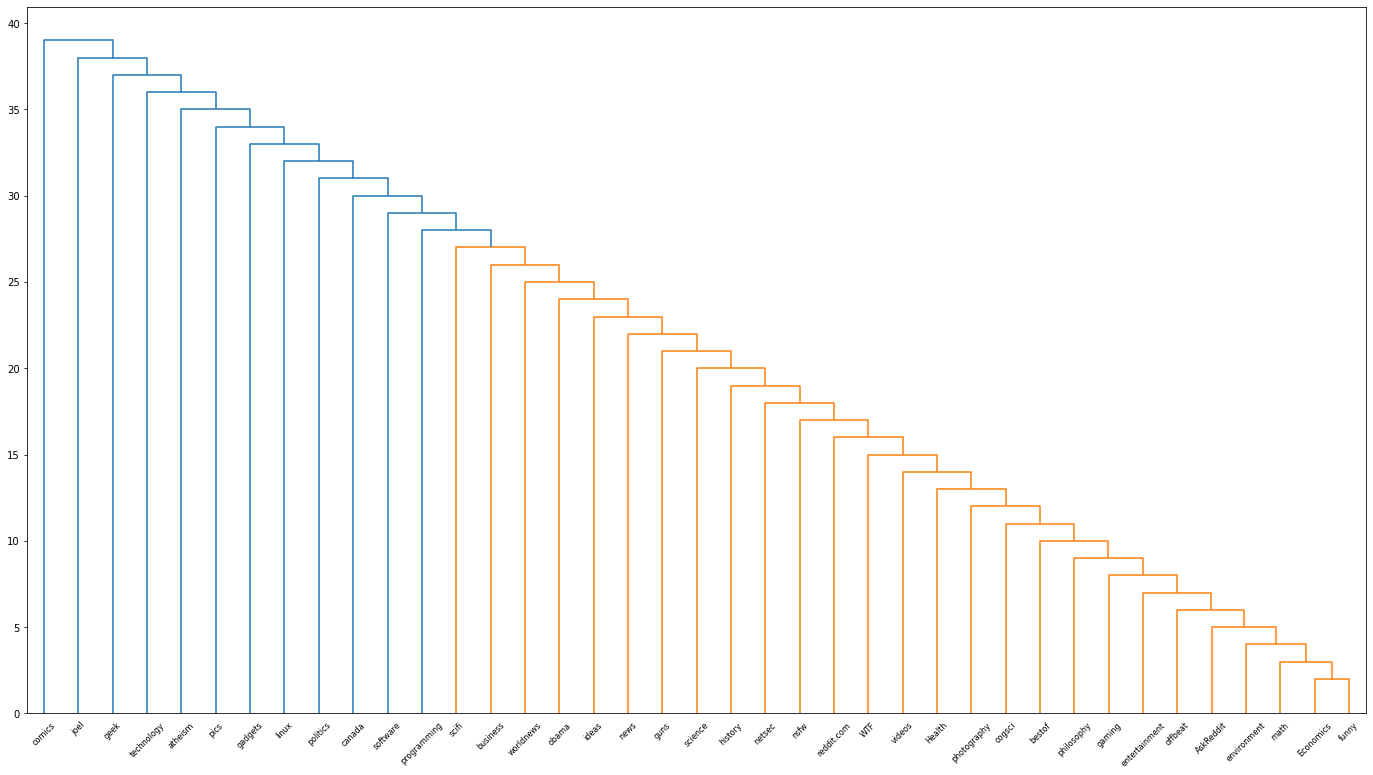

In [95]:
plot_and_save_dendrogram(G)

In [ ]:
#25. SNetT network is inside SNet core

In [5]:
#1.23
bridges = list(nx.bridges(G))
potential_brokers = []
for bridge in bridges:
    potential_brokers.append(bridge[0])
    potential_brokers.append(bridge[1])
print('Potential most influencial brokers: ',set(potential_brokers))

Potential most influencial brokers:  set()


In [8]:
print('Most influencial brokers based on betweenes centrality')
bc_items = sorted(BC.items(), key=operator.itemgetter(1), reverse=True)[:]
for bc_item in bc_items:
    if bc_item[0] in set(potential_brokers) and bc_item[1]>0:
        print(bc_item[0], "   ", bc_item[1])

Most influencial brokers based on betweenes centrality
